## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [3]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [5]:
CREDIT = app_train[['TARGET', 'AMT_CREDIT']].copy()
CREDIT

,TARGET,AMT_CREDIT
0,1,406597.5
1,0,1293502.5
2,0,135000.0
3,0,312682.5
4,0,513000.0
5,0,490495.5
6,0,1560726.0
7,0,1530000.0
8,0,1019610.0
9,0,405000.0


In [7]:
CREDIT['CREDIT_BIN'] = pd.cut(CREDIT['AMT_CREDIT'], 10)
CREDIT_grouped = CREDIT.groupby('CREDIT_BIN')
CREDIT_grouped.mean()

,TARGET,AMT_CREDIT
CREDIT_BIN,,
"(40995.0, 445500.0]",0.082200,2.505313e+05
"(445500.0, 846000.0]",0.091237,6.142435e+05
"(846000.0, 1246500.0]",0.065833,1.017797e+06
"(1246500.0, 1647000.0]",0.056319,1.384341e+06
"(1647000.0, 2047500.0]",0.045595,1.826565e+06
"(2047500.0, 2448000.0]",0.025243,2.218472e+06
"(2448000.0, 2848500.0]",0.032258,2.549020e+06
"(2848500.0, 3249000.0]",0.086957,3.035340e+06
"(3249000.0, 3649500.0]",0.000000,3.413981e+06


In [13]:
pd.value_counts(CREDIT['CREDIT_BIN'])

(40995.0, 445500.0]       125109
(445500.0, 846000.0]      112729
(846000.0, 1246500.0]      44613
(1246500.0, 1647000.0]     18768
(1647000.0, 2047500.0]      4847
(2047500.0, 2448000.0]      1030
(2448000.0, 2848500.0]       372
(2848500.0, 3249000.0]        23
(3649500.0, 4050000.0]        12
(3249000.0, 3649500.0]         8
Name: CREDIT_BIN, dtype: int64

In [9]:
import seaborn as sns

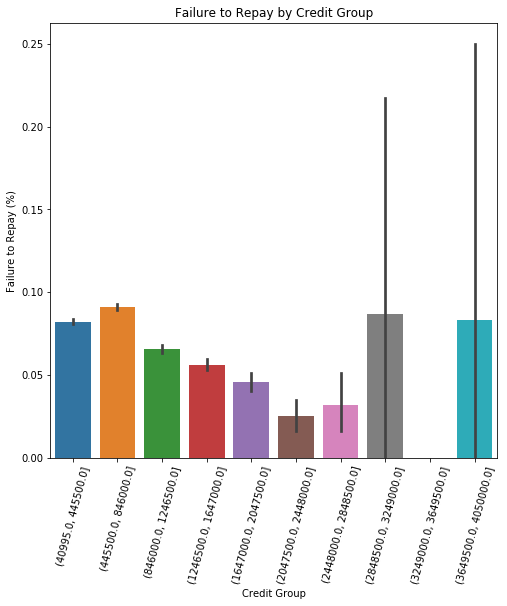

In [10]:
plt.figure(figsize = (8, 8))

px = CREDIT['CREDIT_BIN']
py = CREDIT['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75); plt.xlabel('Credit Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Credit Group');